In [1]:
library(tidyverse)
library(tidymodels) 
set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Rows: 100000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gender, smoking_history
dbl (7): age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_l...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


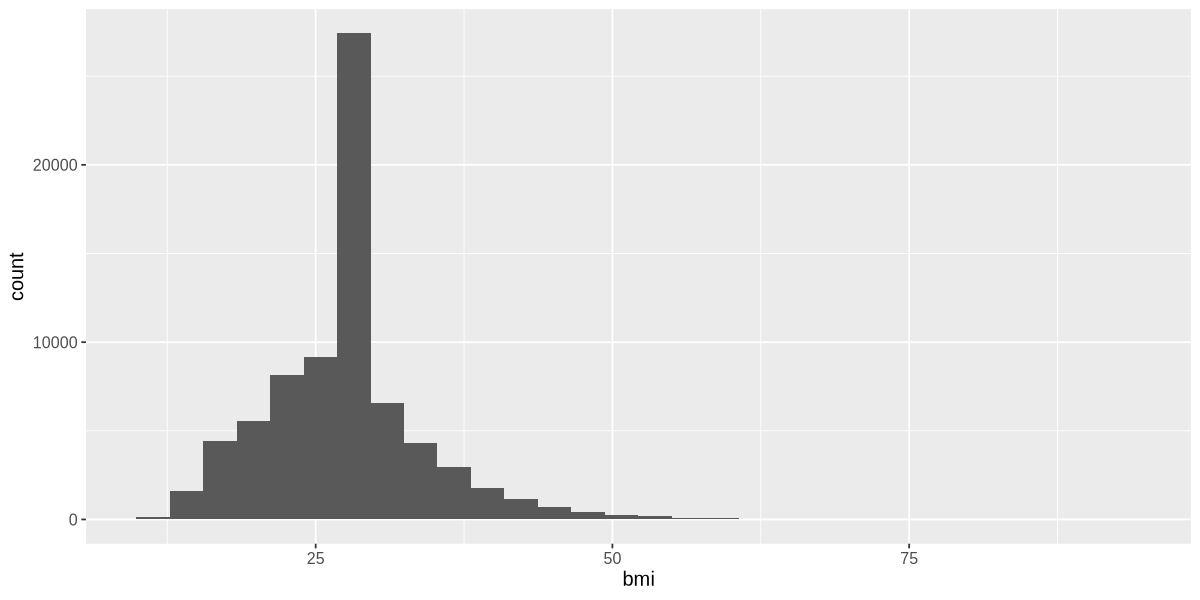

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


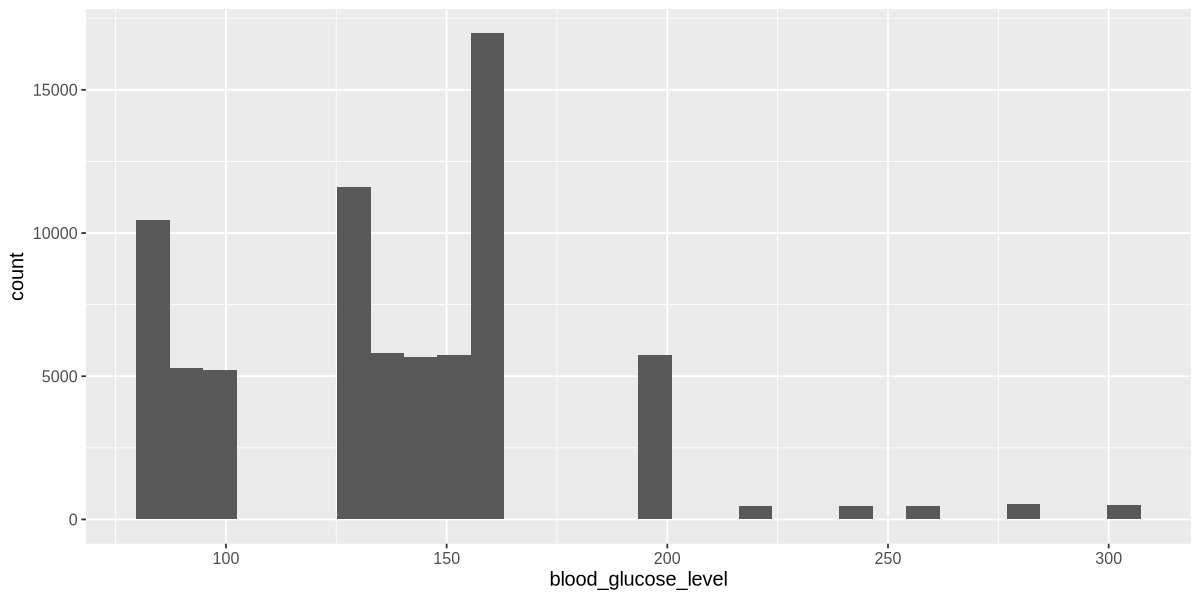

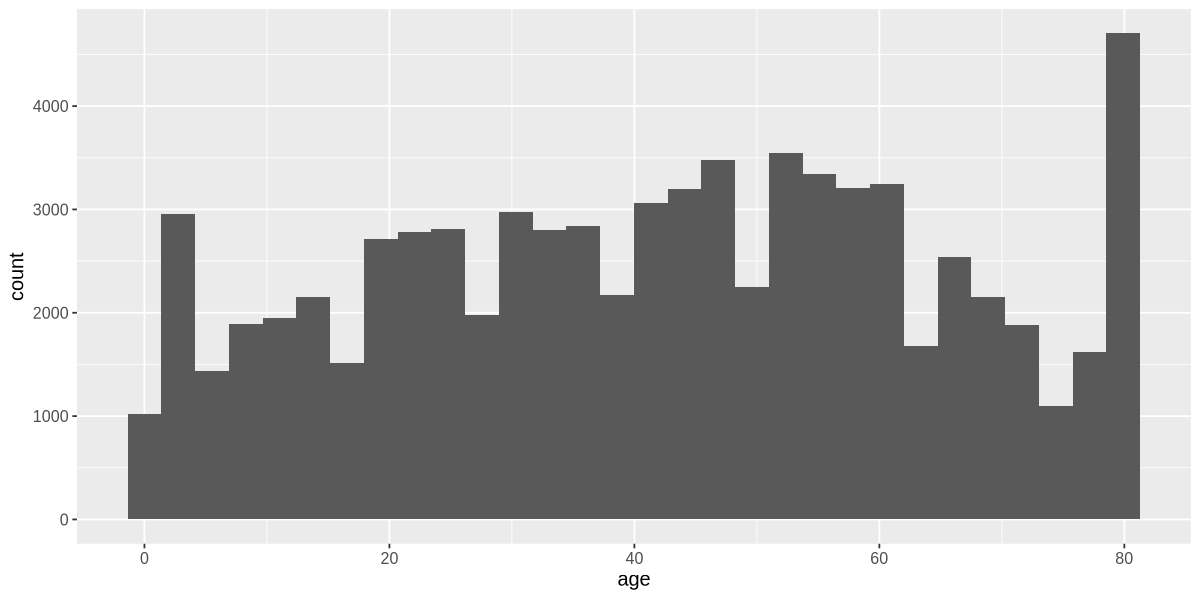

In [2]:
#reading dataset and reformatting diabetes column
diabetes_data <- read_csv("https://raw.githubusercontent.com/danialtaj0/Dataset/main/diabetes_prediction_dataset.csv") |> 
    mutate(diabetes = as_factor(diabetes)) |>
    mutate(diabetes = fct_recode(diabetes, "diabetic" = "1", "non-diabetic" = "0"))
#making training set
dd_train <- initial_split(diabetes_data, prop = 0.75, strata = diabetes) |>
    training()
#making histograms
options(repr.plot.height = 5, repr.plot.width = 10)

bmi_dist <- ggplot(dd_train, aes(x = bmi)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12))

blood_glucose_dist <- ggplot(dd_train, aes(x = blood_glucose_level)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12))

age_dist <- ggplot(dd_train, aes(x = age)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12))

bmi_dist
blood_glucose_dist
age_dist